# Homework 6
Welcome to your sixth homework assignment for CSC 294. In this assignment, we will 
practice implementing SVM using three kernels. 

In this assignment, we will use the dataset stored in `hw6_data`. This dataset has 
three columns: an `x`-coordinate, a `y`-coordinate, and a label (either 1 or 0). __Our goal is to determine which kernel for SVM leads to the best classification of the data into the two classes.__  

A few notes before we begin:

1. For this assignment, please submit your work in an jupyter notebook called `hw6_notebook.ipynb`.
1. There are unit tests for this assignment, so that you can check that elements of your code work. Place these elements in the file called `hw6.py`. Note that part of the assignment is showing that the tests pass both locally and on github actions. 

In [1]:
# Import block
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import math
from sklearn.svm import SVC

from svm_plot import *

In [2]:
# Data import block
data = np.genfromtxt("hw6data.csv", delimiter=',')

## Question 1: Projecting data to higher spaces

In this question, we will visualize the impact of two different projections 
on our data. Our investigations will be conducted on both the mean-centered 
and non-mean-centered data.   

### Part A - Centering our data

For this part, create `mean_centered()` data that takes in the data and 
returns data that is centered around the origin (ie. the 0 vector). 

_Note:_ The data for this homework assignment has three columns: 1) an $x$-
value, 2) a $y$-value, and 3) a class label. Your function should take in 
the data with the labels, but the centering should **only** be applied to 
the $x$- and $y$-values.

In [3]:
def mean_centered(data):
    new_data = np.copy(data)
    
    x_mean = data[:, 0].mean()
    y_mean = data[:, 1].mean()
    
    new_data[:, 0] = data[:, 0] - x_mean
    new_data[:, 1] = data[:, 1] - y_mean
    
    return new_data

In [4]:
data_mc = mean_centered(data)
data_mc

array([[ 0.73169461,  1.44828273,  0.        ],
       [ 0.71648505,  1.79452718,  0.        ],
       [ 2.09350147,  1.82911567,  0.        ],
       ...,
       [-1.82147966,  1.89925319,  1.        ],
       [-1.91843672,  1.54353355,  1.        ],
       [-1.63472897,  1.35690947,  1.        ]])

### Part B - Visualizing projections under our kernels

Recall that the idea behind a kernel is to replace the process of projecting 
our data to a higher space and then computing the SVM. In this part, we will 
construct two different projections that move 2D to 3D:
* Projection 1: $(x_1,x_2)$ --> $(x_1, x_2, \exp{-(x_1^2 +x_2^2)})$  
* Projection 2: $(x_1,x_2)$ --> $(x_1^2,\sqrt{2}x_1x_2, x_2^2)$  

for this question, create four 3-dimensional plots, one for each of the following:
* Projection 1 on data **without** mean-centering  
* Projection 1 on **mean-centered** data  
* Projection 2 on data **without** mean-centering  
* Projection 2 on **mean-centered** data   

All of your plots should apply color your data based on the class that it 
belongs to. 


_Note 1:_ Projection 1 is the mental picture that many use to understand the 
_radial basis kernel,_ see [this example](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html#Beyond-linear-boundaries:-Kernel-SVM). However, we note that 
projection underlying the RBF is a projection to infinite space (see 
discussion [here](Use Gaussian RBF kernel for mapping of 2D data to 3D) and 
[here](https://stats.stackexchange.com/questions/109300/applying-an-rbf-kernel-first-and-then-train-using-a-linear-classifier) for more information). 

_Note 2:_ Projection 2 is similar to the projection underlying the 
_polynomial kernel of degree 2._ To learn more about this kernel, see 
[this wikipedia page](https://en.wikipedia.org/wiki/Polynomial_kernel). 

In [5]:
def proj_one(data):
    
    r = len(data)
    proj = np.empty((r, 4))
    
    proj[:, 0] = data[:, 0]
    proj[:, 1] = data[:, 1]
    proj[:, 2] = np.exp(-(data[:, 0]**2 + data[:, 1]**2))
    proj[:, 3] = data[:, 2]
    
    return proj


def proj_two(data):
    
    r = len(data)
    proj = np.empty((r, 4))
    
    proj[:, 0] = data[:, 0]**2
    proj[:, 1] = data[:, 0] * data[:, 1] * math.sqrt(2)
    proj[:, 2] = data[:, 1]**2
    proj[:, 3] = data[:, 2]
    
    return proj

In [6]:
# 3D plot for Projection 1 on data **without** mean-centering
data_proj1 = proj_one(data)

%matplotlib widget
fig = plt.figure(figsize=(7, 5))
ax = plt.axes(projection='3d')
ax.scatter(data_proj1[:, 0], data_proj1[:, 1], data_proj1[:, 2], c=data_proj1[:, 3], cmap='bwr');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [7]:
# 3D plot for Projection 1 on data **with** mean-centering
data_mc_proj1 = proj_one(data_mc)

%matplotlib widget
fig = plt.figure(figsize=(7, 5))
ax = plt.axes(projection='3d')
ax.scatter(data_mc_proj1[:, 0], data_mc_proj1[:, 1], data_mc_proj1[:, 2], c=data_mc_proj1[:, 3], cmap='bwr');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
# 3D plot for Projection 2 on data **without** mean-centering
data_proj2 = proj_two(data)

%matplotlib widget
fig = plt.figure(figsize=(7, 5))
ax = plt.axes(projection='3d')
ax.scatter(data_proj2[:, 0], data_proj2[:, 1], data_proj2[:, 2], c=data_proj2[:, 3], cmap='bwr');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
# 3D plot for Projection 2 on data **with** mean-centering
data_mc_proj2 = proj_two(data_mc)

%matplotlib widget
fig = plt.figure(figsize=(7, 5))
ax = plt.axes(projection='3d')
ax.scatter(data_mc_proj2[:, 0], data_mc_proj2[:, 1], data_mc_proj2[:, 2], c=data_mc_proj2[:, 3], cmap='bwr');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Part C - Choose a "best" projection

In kernel SVM, our goal is to project our data into a higher dimensional 
space such that the classes are well separated. Examine your four plots 
and decide which one offers the best resulting projection for splitting 
the data with a rigid plane (as in a wall dividing the 3D space). In your 
answer, you must state: 1) which projection (1 or 2) you are selecting 
and 2) whether the data needs to be mean-centered or not. Justify your 
choice. 

__My Answer__:

* projection 2
* with mean-centering

In the first three cases, the dataset is grouped into four clusters (two clusters for each color), and it seems impossible to find one plane to separate the clusters. However, in the fourth graph __with mean-centering and projection 2__, the dataset is grouped into a cluster of blue points and a cluster of red points. The two clusters can be easily separated by a plane, which is the desired situation.

## Question 2: Perform 10-fold Cross-Validation

Create a function `ten_fold` that performs a 10-fold cross validation for 1) a 
given dataset, 2) a specified kernel, and 3) a flag that tells you whether 
to mean-center your data. Your function should only output the cross-validation 
error and nothing else. 

Perform 10-fold cross-validation to determine which kernel is the appropriate one 
for our SVM: 
* Linear kernel (ie. the usual dot-product one)
* Radial basis kernel (ie. the one with a projection similar to projection 1)
* Polynomial kernel of degree 2  (ie. the one with a projection similar to projection 2)

For the later two, either pre-process your data with mean-centering or not, 
based on your answer from question 1C. 

Select one of your kernels as the appropriate one. Justify your choice. 

In [10]:
def ten_fold(data_with_class, kernel, mean_center_flag):
    
    n = len(data_with_class)  # number of data points
    group_n = n//10  # numbrt of datapoints in each group

    # check mean_center_flag
    if mean_center_flag == True:
        data = mean_centered(data_with_class)
    else:
        data = data_with_class

    # implement ten_fold cross-val
    i = 0
    test_errors = []
    while i < 9:
        test_inds = list(range(n))[group_n*i:group_n*(i+1)]
        test_data = data[test_inds, :]
        train_inds = list(set(range(n)).difference(set(test_inds)))
        train_data = data[train_inds, :]

        if kernel == "poly":
            SVM = SVC(kernel='poly', degree=2, gamma='auto', C=1000)
        else:
            SVM = SVC(kernel=kernel, C=1000)
        SVM.fit(train_data[:, :2], train_data[:, 2])

        test_preds = SVM.predict(test_data[:, :2])
        test_error = np.mean((test_preds - test_data[:, 2])**2)
        test_errors.append(test_error)

        i += 1  # update i at the END of loop!!

    test_inds = list(range(n))[group_n*i:]
    test_data = data[test_inds, :]
    train_inds = list(set(range(n)).difference(set(test_inds)))
    train_data = data[train_inds, :]

    if kernel == "poly":
        SVM = SVC(kernel='poly', degree=2, gamma='auto', C=1000)
    else:
        SVM = SVC(kernel=kernel, C=1000)
    SVM.fit(train_data[:, :2], train_data[:, 2])

    test_preds = SVM.predict(test_data[:, :2])
    test_error = np.mean((test_preds - test_data[:, 2])**2)
    test_errors.append(test_error)

    return np.average(test_errors)

In [11]:
# Apply ten_fold() to get the cross-val error for linear kernel SVM
kernel = "linear"
linear_crossval_error = ten_fold(data, kernel, True)
linear_crossval_error

1.0

In [12]:
# Apply ten_fold() to get the cross-val error for RBF kernel SVM
kernel = "rbf"
rbf_crossval_error = ten_fold(data, kernel, True)
rbf_crossval_error

0.0

In [13]:
# Apply ten_fold() to get the cross-val error for polynomial kernel SVM
kernel = "poly"
poly_crossval_error = ten_fold(data, kernel, True)
poly_crossval_error

0.0

**Discuss which kernel is the "appropriate" one. Justify your choice.**

__My Answer__:  
Since with mean-centering, both the polynomial (degree=2) kernel and the radial basis kernel get a cross-validation error of 0, while the lineal kernel gets a cross-validation error of 0.956, I think both poly and rbf kernels are appropriate (compared with the lineal kernel). Combining with the plots from question 1, in this case, I think **poly** is the best kernel among all three since projection 2 seems to be the most reasonable projection.

## Question 3: Tune your model 

Once you have selected your kernel, use all of the data to tune the SVM using 
your selected kernel. Show the results in a 2-D plot that shows **both** the 
decision boundary and the margins. Note your observations about this plot in 
two to four sentences. 

In [14]:
# Tune your model
SVM = SVC(kernel='poly', degree=2, C=1000)
SVM.fit(data_mc[:, :2], data_mc[:, 2])

SVC(C=1000, degree=2, kernel='poly')

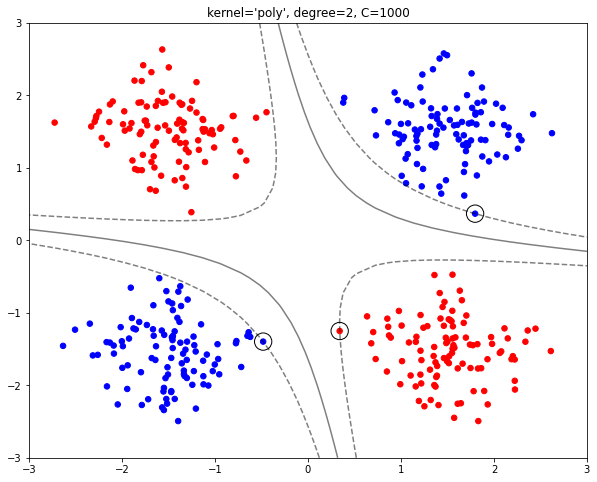

In [15]:
# Plot datapoints from the train/test set with the SVM
%matplotlib inline
plt.figure(figsize=(10, 8))
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.scatter(data_mc[:, 0], data_mc[:, 1], c=data_mc[:, 2], s=30, cmap='bwr')
plt.title("kernel='poly', degree=2, C=1000")
plot_svc_decision_function(SVM, plot_support=True);

**My Observations:**  
The kernel selected for the model is the polynomial kernel of degree 2, the c value is set to 1000. Data points in the top-left and bottom-right clusters are in one class, and points in the top-right and bottom-left clusters are in the other class. One red data point and two blue data points serve as supporting vectors. No data points are on the wrong side or within the decision margins. I think this model does a pretty good job telling the two classes apart.

## Question 4: Explore new data

There is some new data contained in the `validation.csv`. Using the kernel 
SVM you tuned from question 3 determine which classes your SVM classifier 
thinks the points should belong to. Compare these SVM given classes to the 
*actual* classes that they belong to.

Show this validation data on the same plot as the decision boundary and the 
margins _without_ the data used to tune the model. 

In [16]:
# Use your model to predict the classes for the data points in the validation set
val_data = np.genfromtxt("validation.csv", delimiter=',')

# get mean of hw6data
x_mean = data[:, 0].mean()
y_mean = data[:, 1].mean()

# use mean of hw6data to center the validation dataset
val_data_mc = np.copy(val_data)
val_data_mc[:, 0] = val_data[:, 0] - x_mean
val_data_mc[:, 1] = val_data[:, 1] - y_mean

val_predicts = SVM.predict(val_data_mc[:, :2])
print("real class:", val_data_mc[:, 2])
print("prediction:", val_predicts)

real class: [0. 0. 0. 1. 0. 1. 0. 1. 1. 1.]
prediction: [1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]


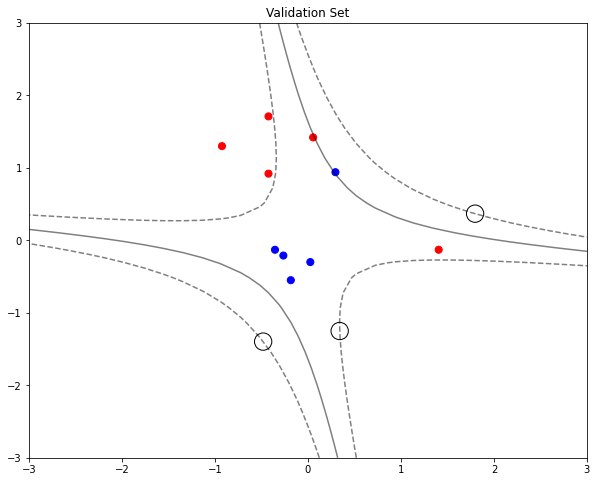

In [17]:
# Plot datapoints from the validation set with the SVM
%matplotlib inline
plt.figure(figsize=(10, 8))
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.scatter(val_data_mc[:, 0], val_data_mc[:, 1], c=val_data_mc[:, 2], s=50, cmap='bwr')
plt.title("Validation Set")
plot_svc_decision_function(SVM, plot_support=True);

**My Observations:**  

I do not think the model does a good job on the validation dataset. Four out of ten predictions are incorrect, and seven out of ten data points are either on the wrong side or within the decision margins. Maybe the model has been overfit on the training dataset.